In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
games_df = pd.read_csv("Raw_Data/2019-2020-NBA.csv")
games_df = games_df.drop(columns = ['Unnamed: 0'],axis=1)
game_df = games_df.dropna()
game_df

,Date,Home Team,Home Score,Road Team,Road Score,Venue
0,2019-10-23T00:00:00.000Z,TOR,130.0,NOP,122.0,Scotiabank Arena
1,2019-10-23T02:30:00.000Z,LAC,112.0,LAL,102.0,Staples Center
2,2019-10-23T23:00:00.000Z,CHA,126.0,CHI,125.0,Spectrum Center
3,2019-10-23T23:00:00.000Z,ORL,94.0,CLE,85.0,Amway Center
4,2019-10-23T23:00:00.000Z,IND,110.0,DET,119.0,Bankers Life Fieldhouse
...,...,...,...,...,...,...
966,2020-03-11T02:30:00.000Z,GSW,107.0,LAC,131.0,Chase Center
967,2020-03-11T23:00:00.000Z,PHI,124.0,DET,106.0,Wells Fargo Center
968,2020-03-11T23:30:00.000Z,MIA,98.0,CHA,109.0,American Airlines Arena
969,2020-03-11T23:30:00.000Z,ATL,131.0,NYK,136.0,State Farm Arena


In [96]:
home_wins = 0
home_losses = 0
for index, row in game_df.iterrows():
    if row["Home Score"]>row["Road Score"]:
        home_wins += 1 
    else:
        home_losses += 1
print(home_wins)
print(home_losses)


535
436


In [113]:
home_wins_df = pd.DataFrame({"Home Team Wins":[home_wins],
                            "Home Team Losses":[home_losses]})
home_switched = home_wins_df.swapaxes("index", "columns")
home_switched = home_switched.rename(columns = {0:"Home Games"})
home_wins_df

,Home Team Wins,Home Team Losses
0,535,436


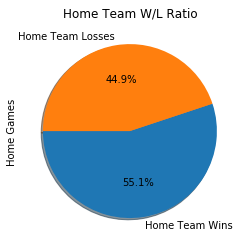

In [131]:
home_pie = home_switched.plot(kind="pie",y=0, title = "Home Team W/L Ratio", autopct='%1.1f%%',
                                        shadow= True, startangle = 180, legend = False, )
patches, labels = home_pie.get_legend_handles_labels()
plt.savefig("Images/home_game_pie.png")

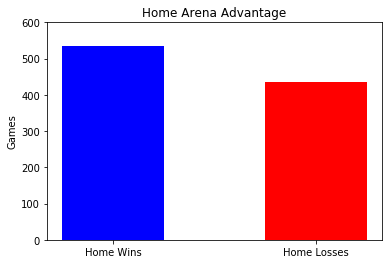

In [130]:
labels = ["Home Wins", "Home Losses"]
xticks = np.arange(len(labels))
plt.bar(labels, home_wins_df.loc[0], color=("b","r"), width = .5)
plt.ylabel("Games")
plt.ylim(0,600)
plt.title("Home Arena Advantage")
plt.savefig("Images/home_game_bar.png")